In [192]:
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F

def preprocess_image(image):
    transform = transforms.Compose([
        transforms.Resize((28, 28)),
        transforms.Grayscale(num_output_channels=1),
        transforms.ToTensor(),
        # Invert the image to match the training data
        transforms.Lambda(lambda x: 1 - x),
        # transforms.Normalize((0.1307,), (0.3081,))
    ])

    image = Image.open(image)
    image = transform(image)

    return image

In [182]:
import torch
from models.model import Net

model = Net()
model_path = r"checkpoints\mnist_model_epoch_10.pth"
model.load_state_dict(torch.load(model_path))
model.eval()

def predict(image_path):
    image = preprocess_image(image_path)

    with torch.no_grad():
        output = model(image.unsqueeze(0))
        _, predicted = torch.max(output.data, 1)

    return predicted.item()

C:\Users\Admin\AppData\Local\Temp\ipykernel_13728\2904556511.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


In [61]:
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST('./data', train=True, download=True)
valid_dataset = datasets.MNIST('./data', train=False, download=True, transform=transform)


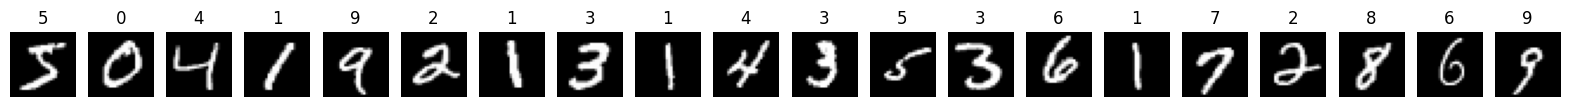

In [122]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 20, figsize=(20, 2))
for i in range(20):
    image, label = train_dataset[i]
    axs[i].imshow(image, cmap='gray')
    axs[i].set_title(label)
    axs[i].axis('off')
plt.show()

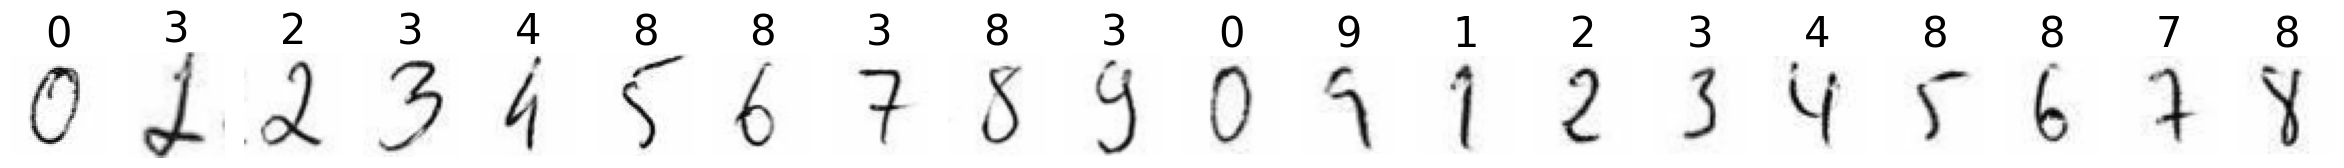

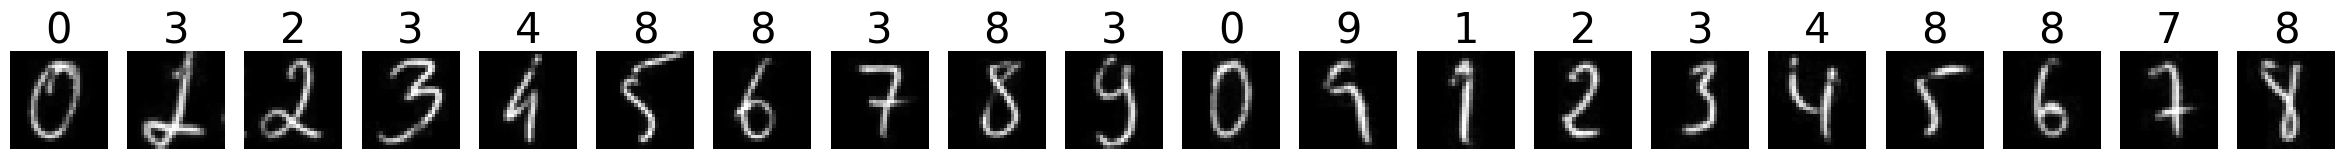

In [193]:
# Test the model on test_images
import os
import matplotlib.pyplot as plt

folder_path = r"test_images"
images = os.listdir(folder_path)
fig, axs = plt.subplots(1, len(images), figsize=(30, 3))
fig1, axs1 = plt.subplots(1, len(images), figsize=(30, 3))

for i, image_path in enumerate(os.listdir(folder_path)):
    image_path = os.path.join(folder_path, image_path)
    image = Image.open(image_path)
    axs[i].imshow(image, cmap='gray')
    axs[i].set_title(predict(image_path), fontsize=30)
    axs[i].axis('off')

    image = preprocess_image(image_path)
    image = F.to_pil_image(image)
    axs1[i].imshow(image, cmap='gray')
    axs1[i].set_title(predict(image_path), fontsize=30)
    axs1[i].axis('off')